In [1]:
from ipywidgets import interactive
from scipy.stats import gamma
import numpy as np
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(0,20, 0.005)

def gamma_plot(shape, scale):
    y = gamma.pdf(x, shape, scale=scale)
    return plt.plot(x,y)

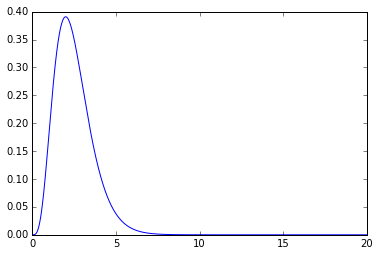

In [3]:
gamma_plot(5, 0.5)

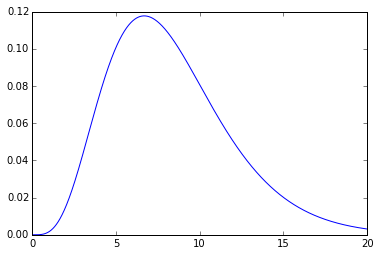

In [4]:
v = interactive(gamma_plot, shape=(0.1, 10.0), scale=(0.3, 3.0))
display(v)

This works, but not really well. The biggest problem is that the figure is removed and recreated each time the slider moves, causing a really distracting flashing effect.  The right way to deal with this is to update the data in the figure and cause it to redraw itself, rather than creating a new figure each time. Unfortunately, the default behavior of the inline backend (which we're using because of `%matplotlib inline` above) is to close figures once they've been plotted, so they can't be modified. In general this is sensible behavior, but with an interactive widget it's not what we want.

Instead, we set the configuration option to preserve the figure handles, and then make one function to set up the plot (generating the figure, axis, and line objects) and then another function to do the update. The update function is the one we'll make interactive.

In [5]:
%config InlineBackend.close_figures=False

x = np.arange(0, 40, 0.005)
def gamma_plot_setup():
    shape = 5
    scale = 0.5
    fig, ax = plt.subplots()
    y = gamma.pdf(x, shape, scale=scale)
    line = ax.plot(x, y)
    ax.set_ylim((0,0.5))
    return fig, ax, line[0]

def gamma_update(shape, scale):
    y = gamma.pdf(x, shape, scale=scale)
    line.set_ydata(y)
    fig.canvas.draw()
    #clear_output(wait=True)
    display(fig)

We run the setup routine...

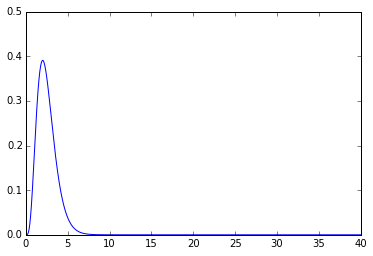

In [6]:
fig, ax, line = gamma_plot_setup()

And then the interactive widget.

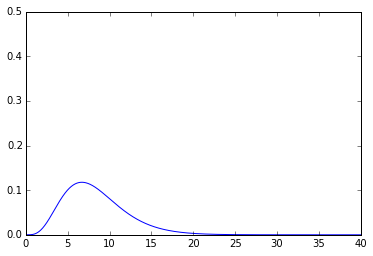

In [7]:
v = interactive(gamma_update, shape=(0.1, 10.0), scale=(0.3, 3.0))
display(v)